In [1]:
# Importando as Bibliotecas necessárias
# Pandas pelo dataframe
# Numpy pelas operações matemáticas (array por ex.)
# Matplotlib pelos gráficos
# Sklearn.model_selection pela regressão linear, split de treino e teste e Validação Cruzada
# Sklearn.metrics para medir os erros
# Sklearn.preprocessing para usar método RobustScaler para achar os outlier
# Usaremos o método de Tukey também para achar os outlier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler

In [3]:
# vamos ler a tabela CSV 
df = pd.read_csv("https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv")

In [4]:
# vamos fazer uma cópia para não alterarmos o original
df_teste = df.copy()

In [5]:
# vamos ver quantos valores nulos tem
df_teste.isnull().sum()

descricao     0
criado        0
qtdInsumos    0
calculado     0
correto       0
dtype: int64

In [6]:
# describe dá um resumo estatístico
df_teste.describe()

,qtdInsumos,calculado,correto
count,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798
std,3.194301,191.266516,189.806974
min,1.000000,30.000100,33.000000
25%,1.000000,49.786100,49.500000
50%,2.000000,87.350300,83.100000
75%,4.000000,165.167000,161.200000
max,26.000000,10364.992500,10356.000000


In [7]:
# olhamos as primeiras linhas de todas as colunas do nosso dataframe
df_teste.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0


In [8]:
# deixamos o preço "calculado" com o valor unitário de insumo
df_teste["calculado"] = [calc/qtde for calc, qtde in df_teste[["calculado","qtdInsumos"]].values]

In [10]:
# deixamos o preço "correto" com o valor unitário
df_teste["correto"] = [corr/qtde for corr, qtde in df_teste[["correto","qtdInsumos"]].values]

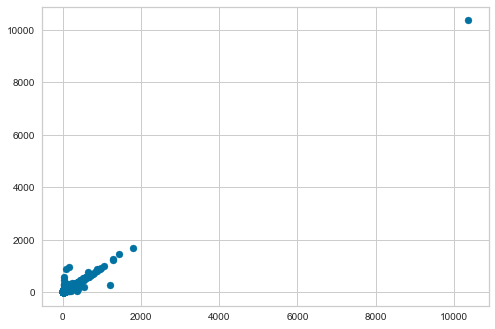

In [11]:
# gráfico de dispersão para tentarmos visualizar outliers
plt.scatter(df_teste["calculado"],df_teste["correto"])

In [12]:
# fatiando as linhas da 1 até a 5121
x = df_teste.iloc[0:5121,3].values
y = df_teste.iloc[0:5121,4].values

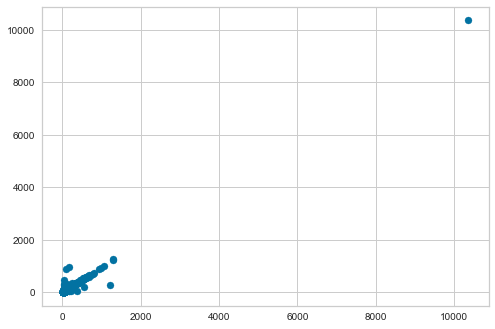

In [13]:
# gráfico de dispersão do novo x e novo y (com o corte de linhas)
plt.scatter(x,y)

Text(0.5, 0, 'calculado')

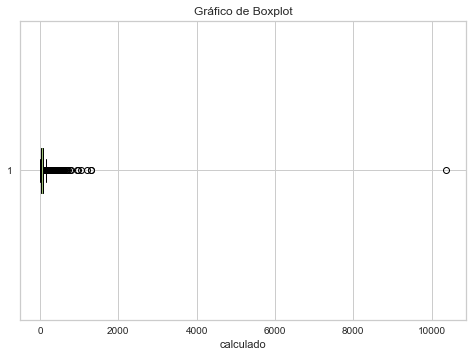

In [22]:
# gráfico Boxplot do "calculado" mostrando os outliers
plt.boxplot(x, vert = False, showfliers = True, notch = False, patch_artist = True)
plt.title("Gráfico de Boxplot")
plt.xlabel("calculado")

Text(0.5, 0, 'correto')

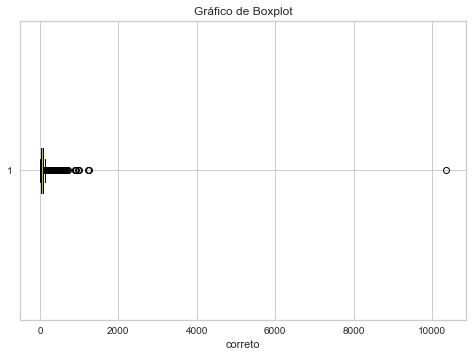

In [27]:
# gráfico Boxplot do "correto" mostrando os outliers
plt.boxplot(y, vert = False, showfliers = True, notch = False, patch_artist = True)
plt.title("Gráfico de Boxplot")
plt.xlabel("correto")

Text(0.5, 0, 'calculado')

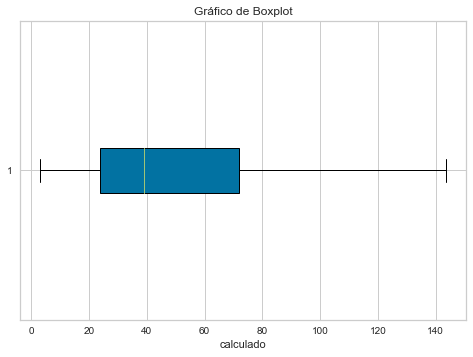

In [28]:
# gráfico Boxplot do "calculado" sem mostrar os outliers
plt.boxplot(x, vert = False, showfliers = False, notch = False, patch_artist = True)
plt.title("Gráfico de Boxplot")
plt.xlabel("calculado")

Text(0.5, 0, 'correto')

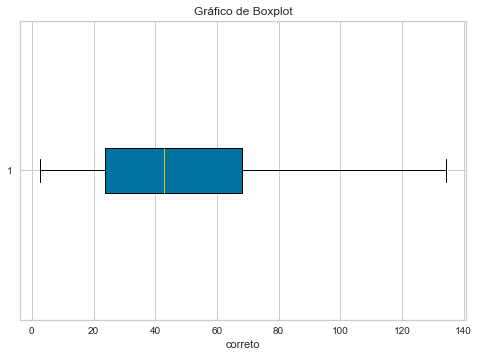

In [32]:
# gráfico Boxplot do "correto" mostrando os outliers
plt.boxplot(y, vert = False, showfliers = False, notch = False, patch_artist = True)
plt.title("Gráfico de Boxplot")
plt.xlabel("correto")

{'whiskers': [<matplotlib.lines.Line2D at 0x16b470f1df0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b471004f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x16b470f1a60>],
 'medians': [<matplotlib.lines.Line2D at 0x16b47100bb0>],
 'fliers': [],
 'means': []}

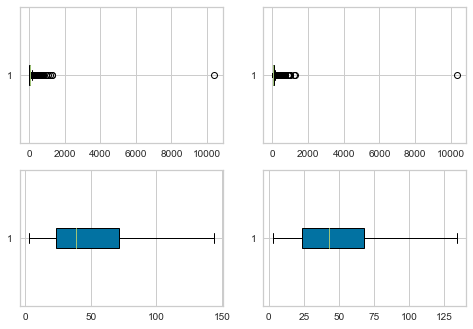

In [31]:
# plotar os 4 gráficos numa mesma região para uma comparação visual
plt.figure(1)
plt.subplot(2,2,1)
plt.boxplot(x, vert = False, showfliers = True, notch = False, patch_artist = True)
plt.subplot(2,2,2)
plt.boxplot(y, vert = False, showfliers = True, notch = False, patch_artist = True)
plt.subplot(2,2,3)
plt.boxplot(x, vert = False, showfliers = False, notch = False, patch_artist = True)
plt.subplot(2,2,4)
plt.boxplot(y, vert = False, showfliers = False, notch = False, patch_artist = True)

In [44]:
# redimensionar 
x = x.reshape(-1,1)

In [35]:
# atribui uma regressão linear e treinar esse modelo
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [36]:
# valor do intercepto
modelo.intercept_

0.34552999629825365

In [37]:
# coeficiente
modelo.coef_

array([0.97395135])

In [39]:
# calcula o score do modelo para sabermos o quão eficiente ele é
modelo.score(x,y)

0.9759960297146668

In [42]:
# faz as previsões baseada na regressão linear
previsoes = modelo.predict(x)

In [41]:
df_teste.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.529700,39.900000
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.962000,43.600000
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,35.046333,37.133333
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.031400,43.600000
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,80.913600,73.000000


In [46]:
# 1º exemplo de previsão
# 60 CAP | ANASTROZOL 1:10 0.300MG	2020-08-05 22:51:09	1 (49.031400 43.600000)
previsoes = modelo.predict([[49.031400]])
previsoes

array([48.09972838])

In [47]:
# 2º exemplo de previsão
# 60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...2020-08-05 22:51:09	3 (35.046333 37.133333)
previsoes = modelo.predict([[35.046333]])
previsoes

array([34.47895345])

In [48]:
# 3º exemplo de previsão
# 60 CAP | FINASTERIDA 1:10 1MG	2020-08-05 22:51:09	1 (46.962000 43.600000)
previsoes = modelo.predict([[46.962000]])
previsoes

array([46.08423345])

In [50]:
# usando o método cross validation podemos validar nosso modelo, mas antes fazer fazer testes e treinos
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size= 0.3)
# usamos o svm(Support Vector Machines) com o svc(Linear Support Vector Classification)
clf = svm.SVC(gamma="auto")
# treinando o clf
clf.fit(x_train,y_train)
# calculamos o score para saber o quão eficiente é o nosso modelo
clf.score(x_test,y_test)
# usamos a validação cruzada com 5 dobras
scores = cross_val_score(clf, iris.data, iris.target, cv = 5, scoring = "accuracy")
# usamos a média dos scores (cada treino/teste tem um score, por isso precisamos da média)
scores.mean()

NameError: name 'iris' is not defined

In [51]:
# usando o método RobustScaler para achar os outliers
X = [[ 1., 0.,  2.], [ 2.,  0.,  -1.], [ 0.,  2., -1.]]
transformer = RobustScaler().fit(X)
transformer.transform(X)

array([[ 0.,  0.,  2.],
       [ 1.,  0.,  0.],
       [-1.,  2.,  0.]])

In [ ]:
# podemos criar uma função para usar o método de tukey e achar os outliers
# método tukey: consiste em achar os limites inferior e superior e não admitir qualquer ponto fora desses limites
def removeoutlier(values):

    fator = 1.5

    q3, q1 = np.percentile(values, [75, 25])

    iqr = (q3)-(q1)

    lowpass = q1 - (iqr * fator)

    highpass = q3 + (iqr * fator)

    return [v for v in values if v > lowpass and v < highpass]